<a href="https://colab.research.google.com/github/Chanonsersa/Numerical-Analysis/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ชานนท์ ตรีเมต 59102010565

# Lab 3: Linear regression (10 pts.)

## Part I

โหลดข้อมูล test_stat1_XX.csv จาก ATutor ลงบน notebook โดย XX = mod( รหัสนิสิต 2 ตัวสุดท้าย, 60) + 1 <br\><br\> ใช้คำสั่ง x, y = np.loadtxt("test_stat1_XX.csv") ในการโหลดข้อมูลมาใส่ตัวแปร x (independent variables) และ y (dependent variables)



**Q1** Plot รูปความสัมพันธ์ของข้อมูล x และ y ที่ได้จาก  test_stat1_XX.csv จากรูปคุณคิดว่าเราควรย่อย (regress) ความสัมพันธ์ของข้อมูลชุดนี้ด้วยสมการเส้นตรงหรือไม่ เพราะอะไร 

In [4]:
# Import modules
import traceback
import math
import pandas as pd
import numpy as np
import scipy
import scipy.linalg as LA
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
x, y = np.loadtxt("test_stat1_6.csv")

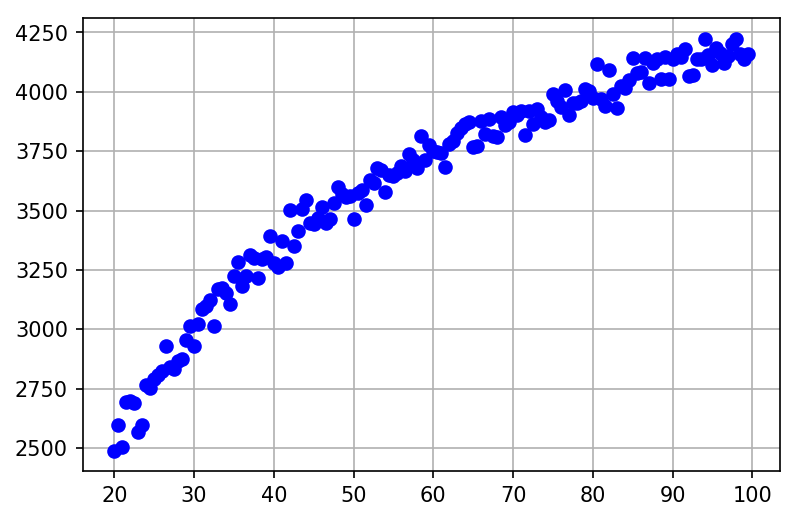

In [65]:
q1, = plt.plot(x, y, 'o', color='b')
plt.grid(True)
plt.show()

**Answer**: สามารถ regress เป็นเส้นตรงได้ เพราะข้อมูลไปในทางเดียวกัน

**Q2** จากข้อมูลที่ได้จาก test_stat1_XX.csv สมมุติว่าเราทำการย่อยข้อมูลด้วยสมการเส้นตรง จงคำนวณหาค่าต่อไปนี้ 
1. ความชัน, 
2. จุดตัดแกน y
3. $S_r$
4. $r^2$

**Hint**: ให้เขียนโปรแกรมแสดงการคำนวณให้ชัดเจน สามารถตรวจคำตอบได้โดยใช้ stats.linregress

In [73]:
def find_slope(x, y):
    xy = x * y
    x2 = x ** 2
    return (xy.mean() - (x.mean() * y.mean())) / (x2.mean() - (x.mean() ** 2))

def find_intercept(x, y):
    slope = find_slope(x, y)
    return y.mean() - (slope * x.mean())

def find_sr(x, y):
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    sum_error = 0
    for i in range(x.size):
        sum_error += math.pow(y[i] - ((slope * x[i]) + intercept), 2)
    return sum_error

def find_st(y):
    sum_st = 0
    for i in range(y.size):
        sum_st += math.pow((y[i] - y.mean()), 2)
    return sum_st

def find_r2(x, y):
    st = find_st(y)
    sr = find_sr(x, y)
    return (st - sr) / st

#def linregress(x, y):

In [12]:
print(find_slope(x, y))
print(find_intercept(x, y))
print(find_sr(x, y))
print(find_r2(x, y))

-15.07499194388499
-12.008961880454649
3516551.164496027
0.6993675285880356


1. ความชัน = -15.075
2. จุดตัดแกน y = -12.009
3. $S_r$ = 3,516,551.164
4. $r^2$ = 0.69

**Q3** จากข้อมูลของ $r^2$ ที่คำนวณได้ในข้อ **Q2** ให้เหตุผลว่าการใช้สมการเส้นตรงในข้อ Q2 ในการย่อยข้อมูลนั้นมีประสิทธิภาพหรือไม่ เพราะเหตุใด________

**Answer**: มีประสิทธิภาพในการประมาณความสัมพันธ์ของข้อมูลเทียบกับ $\bar{y}$ ปานกลาง ยังไม่ค่อยสูงมาก

**Q4** plot สมการเส้นตรงที่คำนวณได้จาก **Q2** ลงไปพร้อมกับข้อมูลที่ได้จาก test_stat1_XX.csv จากรูปที่ได้ จงให้เหตุผลว่าการกระจายตัวของข้อมูลมีความสัมพันธ์กับค่า $r^2$ ที่คำนวณได้ในข้อ Q2) อย่างไร

In [38]:
def linear_regression(x, y):
    reg = []
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    for i in range(x.size):
        reg.append(slope * x[i] + intercept)
    return reg

In [39]:
linear = linear_regression(x, y)

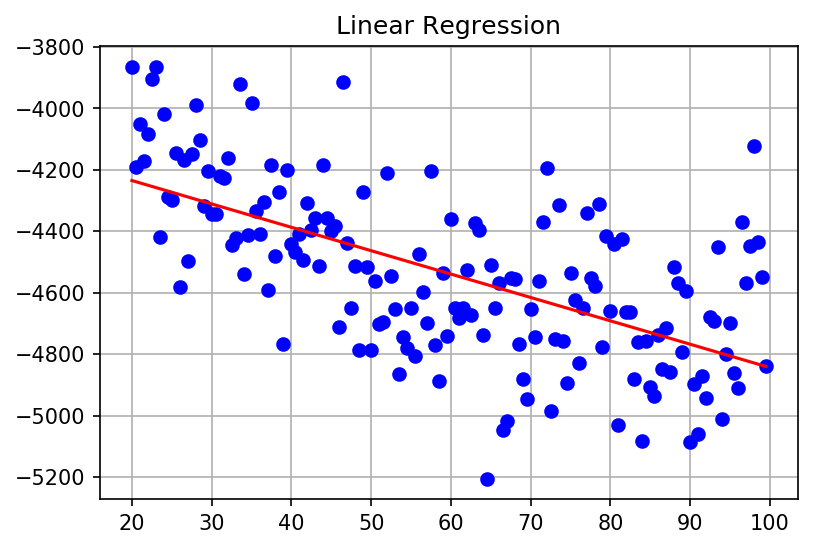

In [40]:
q4, = plt.plot(x, y, 'o', color='b')
reg, = plt.plot(x, linear, color='r')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

**Answer**: ข้อมูลมีการกระจายสูงแต่ยังคงไปในทิศทางเดียวกับเส้น regression

## Part II

โหลดข้อมูล test_stat2_XX.csv จาก ATutor ลงบน notebook โดย XX = mod( รหัสนิสิต 2 ตัวสุดท้าย, 60) + 1 <br\><br\> ใช้คำสั่ง x, y = np.loadtxt("test_stat2_XX.csv") ในการโหลดข้อมูลมาใส่ตัวแปร x (independent variables) และ y (dependent variables)

**Q5** Plot รูปความสัมพันธ์ของข้อมูล x และ y ที่ได้จาก  test_stat2_XX.csv จากรูปคุณคิดว่าเราควรย่อย (regress) ความสัมพันธ์ของข้อมูลชุดนี้ด้วยสมการอะไร เพราะอะไร <br \> **Hint:** ให้เลือกจากสมการ exponential, power และ saturation-growth

In [87]:
x, y = np.loadtxt("test_stat2_6.csv")

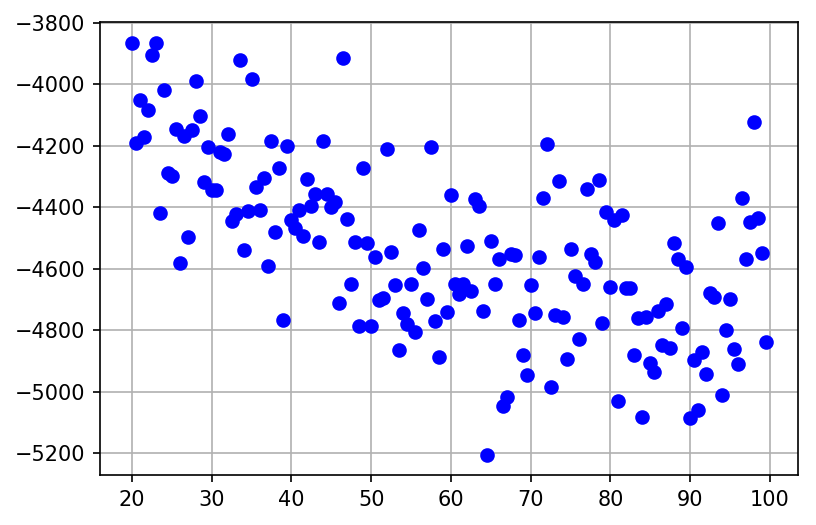

In [88]:
q5, = plt.plot(x, y, 'o', color='b')
plt.grid(True)
plt.show()

**Answer**: saturation-growth

**Q6** ย่อยข้อมูล x และ y ด้วยสมการที่เลือกจากข้อ Q5 แสดงการคำนวณให้ชัดเจนพร้อมทั้ง ระบุ ค่าต่างๆ ($\alpha$, $\beta$, $S_r$, $r^2$) ให้ชัดเจน<br\>**Hint**: สามารถใช้ stats.linregress ในการคำนวณได้

In [89]:
def find_slope(x, y):
    xy = x * y
    x2 = x ** 2
    return (xy.mean() - (x.mean() * y.mean())) / (x2.mean() - (x.mean() ** 2))

def find_intercept(x, y):
    slope = find_slope(x, y)
    return y.mean() - (slope * x.mean())

def find_sr_sat(x, y):
    alpha = 1 / find_intercept(x, y)
    beta = find_slope(x, y) * alpha
    sum_error = 0
    for i in range(x.size):
        sum_error += math.pow(y[i] - (alpha * (x[i] / (beta + x[i]))), 2)
    return sum_error

In [90]:
z = 1 / y
w = 1 / x
a1 = find_slope(w, z)
a0 = find_intercept(w, z)

alpha = 1 / a0
beta = a1 * alpha

sr = find_sr_sat(w, z)
r2 = find_r2(w, z)
slope, intercept, r_value, p_value, std_err = stats.linregress(w, z)
print("alpha %f" % alpha)
print("beta %f" % beta)
print("sr %f" % sr)
print("r2 %f" % r_value ** 2)

alpha -4962.777798
beta 4.849085
sr 84009.027433
r2 0.474145


1. $\alpha$ = -4962.778
2. $\beta$ = 4.849
3. $S_r$ = 84009.024
4. $r^2$ = 0.474

**Q7** จากข้อมูลของ $r^2$ ที่คำนวณได้ในข้อ Q6 ให้เหตุผลว่าการใช้สมการที่เลือกในข้อ Q5 ในการย่อยข้อมูลนั้นมีประสิทธิภาพหรือไม่ เพราะเหตุใด

**Answer**: มีประสิทธิภาพในการประมาณความสัมพันธ์ของข้อมูลเทียบกับ $\bar{y}$ ปานกลาง ยังไม่ค่อยสูงมาก

**Q8** plot สมการที่คำนวณได้จาก **Q5** ลงไปพร้อมกับข้อมูลที่ได้จาก test_stat2_XX.csv จากรูปที่ได้ จงให้เหตุผลว่าการกระจายตัวของข้อมูลมีความสัมพันธ์กับค่า $r^2$ ที่คำนวณได้ในข้อ Q5 อย่างไร การย่อยข้อมูลด้วยสมการที่เลือกจากข้อ Q5 มี bias หรือไม่ อย่างใด

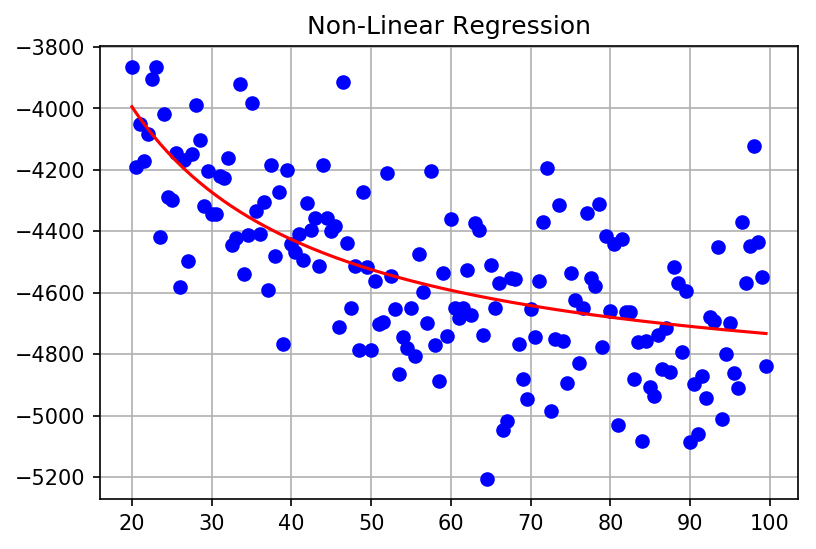

In [91]:
q8, = plt.plot(x, y, 'o', color='b')
reg, = plt.plot(x, alpha * (x / (beta + x)), color='r')
plt.title('Non-Linear Regression')
plt.grid(True)
plt.show()

**Answer**: ข้อมูลกระจายตัวสูงและมีแนวโน้มไปในทางเดียวกับสมการ Non-Linear พบว่า bias น้อย

**Q9** ทำข้อ Q6)-Q8) อีกครั้งด้วยสมการเส้นตรง เปรียบเทียบผลลัพธ์ที่ได้กับการใช้สมการที่เลือกในข้อ Q5 ในการย่อยข้อมูล (เปรียบเทียบค่า $r^2$, bias จากการใช้สมการเส้นตรงในการย่อย)

In [92]:
print(find_slope(x, y))
print(find_intercept(x, y))
print(find_sr(x, y))
print(find_r2(x, y))

-7.609081507090173
-4082.319254951362
7746007.359950615
0.38942691749161523


In [93]:
def linear_regression(x, y):
    reg = []
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    for i in range(x.size):
        reg.append(slope * x[i] + intercept)
    return reg

In [94]:
linear = linear_regression(x, y)

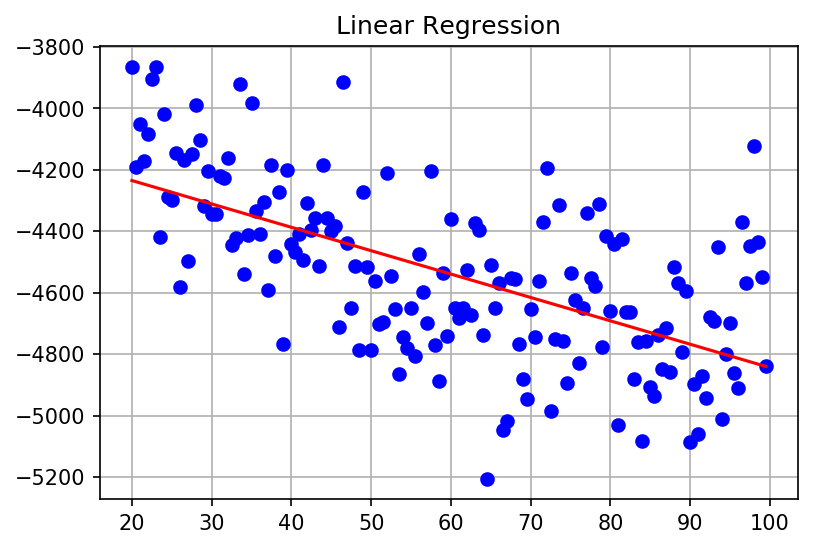

In [95]:
q9, = plt.plot(x, y, 'o', color='b')
reg, = plt.plot(x, linear, color='r')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

**Answer**: สมการเส้นตรงที่ได้พบว่ามีค่า $r^2$ = 0.38 ซึ่งน้อยเกินไปที่จะประมาณข้อมูลว่า